# Challenge Data For Health

---



In [ ]:
import os
import io

In [ ]:
# download of the unibsv git
if not os.path.exists("unibsv"):
  !git clone https://gitlab.com/data-challenge-gd4h/unibsv.git
!pip install pdfminer.six
!pip install pymupdf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Test d'extraction

## Aperçu du pdf

In [ ]:
# pdf_path = "/content/unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N20_09082022.pdf"
# pdf_path = "/content/unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N11_31052022.pdf"
# pdf_path = "/content/unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N14_21062022.pdf"
# pdf_path = "/content/unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N20_09082022.pdf"
pdf_path = "/content/unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N15_28062022.pdf"
pdf_name = os.path.split(pdf_path)[-1][:-4]

'BSV_VITI_LR_N15_28062022'

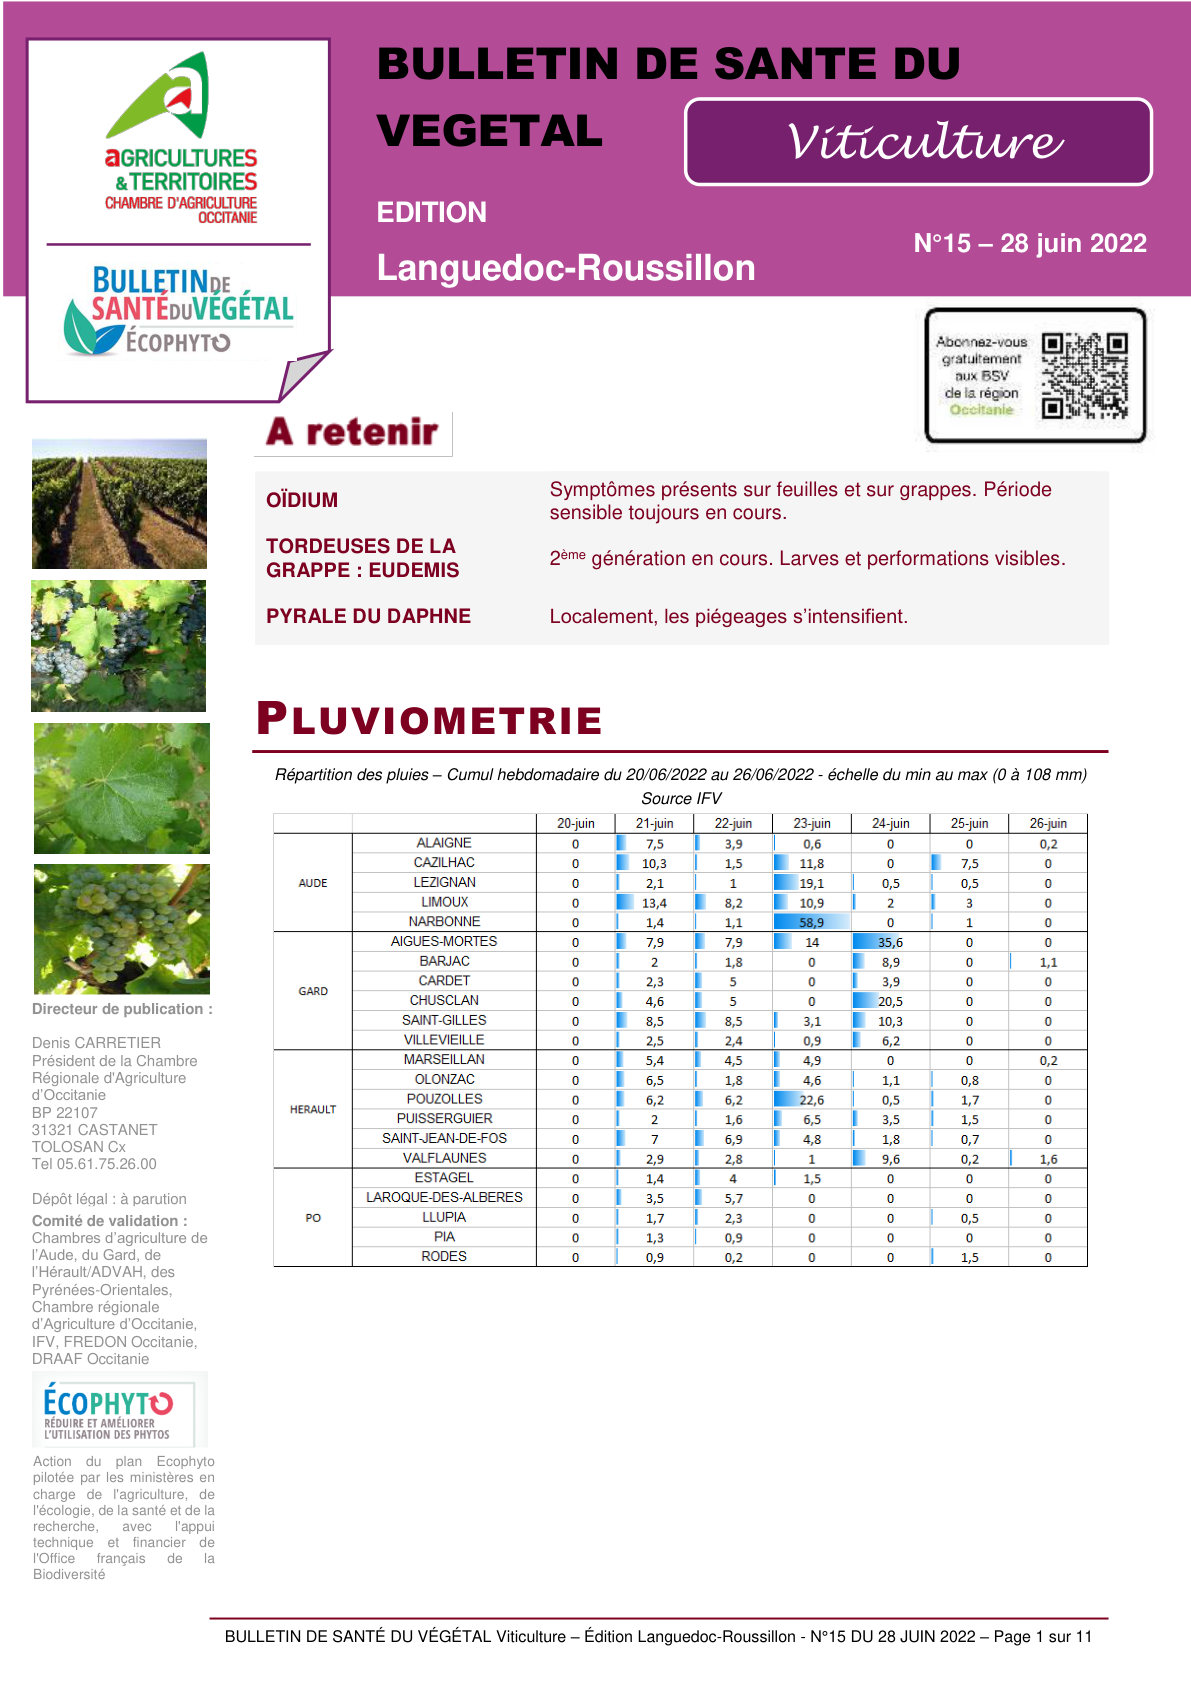

In [ ]:
import fitz  # PyMuPDF
from PIL import Image
!mkdir -p out

# Définir le nom du fichier PDF et le numéro de la page à afficher
page_num = 0
max_display = 1

zoom_x = 2.0  # zoom horizontal
zoom_y = 2.0  # zoom vertical
mat = fitz.Matrix(zoom_x, zoom_y)  # matrice pour mettre à l'échelle la page

# Charger le PDF et convertir la page spécifiée en une image
doc = fitz.open(pdf_path)
for page in doc:
  page_num += 1
  if page_num <= max_display:
    pix = page.get_pixmap(matrix=mat)
    stream = pix.pil_tobytes(format="png", optimize=True)
    img = Image.open(io.BytesIO(stream))
    display(img)

## Structure du pdf


In [ ]:
from pdfminer.high_level import extract_text, extract_pages
from IPython.display import display
from PIL import Image

In [ ]:
print(doc.metadata)

{'format': 'PDF 1.5', 'title': '', 'author': 'Barbara Cichosz', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word\xa02013', 'producer': 'Microsoft® Word\xa02013', 'creationDate': "D:20220628185852+02'00'", 'modDate': "D:20220628185852+02'00'", 'trapped': '', 'encryption': None}


In [ ]:
print(doc.get_toc())

[]


In [ ]:
page = doc.load_page(0)
page.get_links()

[]

### XML

In [1]:
xml_string = page.get_text("xml")
#print(xml_string)

NameError: ignored

In [ ]:
import xml.etree.ElementTree as ET
root = ET.fromstring(xml_string)
for child in root:
    print(child)
    print(child.tag, child.attrib)

<Element 'block' at 0x7f890b9e0810>
block {'bbox': '127.58 27.600007 130.07587 38.640005'}
<Element 'block' at 0x7f890b9e1f80>
block {'bbox': '112.34 812.493 548.8151 823.5399'}
<Element 'block' at 0x7f89126fbf60>
block {'bbox': '15.84 498.86079 108.44167 684.20046'}
<Element 'block' at 0x7f8907ccc090>
block {'bbox': '16.56 725.698 109.55256 767.41708'}
<Element 'block' at 0x7f8907ccf150>
block {'bbox': '16.56 765.894 109.524738 783.497'}
<Element 'block' at 0x7f89080c04a0>
block {'bbox': '16.56 782.214 54.73488 791.77706'}
<Element 'block' at 0x7f89080c09a0>
block {'bbox': '188.06 15.551104 488.24217 46.518136'}
<Element 'block' at 0x7f89080c1120>
block {'bbox': '188.06 49.031145 533.94937 86.87533'}
<Element 'block' at 0x7f89080c1940>
block {'bbox': '188.06 95.99716 247.31313 115.33024'}
<Element 'block' at 0x7f89080c1d00>
block {'bbox': '188.06 120.68 383.074 145.466'}
<Element 'block' at 0x7f89080c24d0>
block {'bbox': '127.58 66.57297 130.34888 196.31801'}
<Element 'block' at 0x7f8

In [ ]:
counter = 0
for single_page_layout in extract_pages(pdf_path):
    counter +=1
    print(f'Page {counter}')
    for elt in single_page_layout:
        print(elt)
    if counter == 1:
        break

Page 1
<LTTextBoxHorizontal(0) 188.060,797.544,488.231,819.504 'BULLETIN DE SANTE DU \n'>
<LTTextBoxHorizontal(1) 188.060,764.064,308.923,786.024 'VEGETAL \n'>
<LTTextBoxHorizontal(2) 188.060,727.952,247.313,741.992 'EDITION \n'>
<LTTextBoxHorizontal(3) 392.350,755.703,533.941,777.663 'Viticulture \n'>
<LTTextBoxHorizontal(4) 188.060,698.200,383.074,716.200 'Languedoc-Roussillon \n'>
<LTTextBoxHorizontal(5) 456.670,713.298,577.543,726.258 'N°15 – 28 juin 2022 \n'>
<LTTextBoxHorizontal(6) 132.980,586.248,171.869,596.208 'OÏDIUM \n'>
<LTTextBoxHorizontal(7) 132.980,551.538,232.499,573.048 'TORDEUSES DE LA \nGRAPPE : EUDEMIS \n'>
<LTTextBoxHorizontal(8) 274.850,580.368,528.801,601.848 'Symptômes présents sur feuilles et sur grappes. Période \nsensible toujours en cours. \n'>
<LTTextBoxHorizontal(9) 274.850,557.208,536.029,567.419 '2ème génération en cours. Larves et performations visibles. \n'>
<LTTextBoxHorizontal(10) 132.980,528.378,238.619,538.338 'PYRALE DU DAPHNE \n'>
<LTTextBoxHoriz

### PDF to dict

In [ ]:
page = doc.load_page(1)
text_dict = page.get_text("dict", sort=False, flags=fitz.TEXTFLAGS_TEXT)
for elt in text_dict.items():
  print(elt)

('width', 595.32)
('height', 841.92)
('blocks', [{'number': 0, 'type': 0, 'bbox': (127.58000183105469, 27.600006103515625, 130.07586669921875, 38.6400032043457), 'lines': [{'spans': [{'size': 11.039999961853027, 'flags': 0, 'font': 'Calibri', 'color': 0, 'ascender': 0.75, 'descender': -0.25, 'text': ' ', 'origin': (127.58000183105469, 35.8800048828125), 'bbox': (127.58000183105469, 27.600006103515625, 130.07586669921875, 38.6400032043457)}], 'wmode': 0, 'dir': (1.0, 0.0), 'bbox': (127.58000183105469, 27.600006103515625, 130.07586669921875, 38.6400032043457)}]}, {'number': 1, 'type': 0, 'bbox': (105.37999725341797, 812.3729858398438, 541.8551025390625, 823.4842529296875), 'lines': [{'spans': [{'size': 8.039999961853027, 'flags': 0, 'font': 'ArialMT', 'color': 0, 'ascender': 1.0750000476837158, 'descender': -0.29899999499320984, 'text': 'BULLETIN DE SANTÉ DU VÉGÉTAL Viticulture – Édition Languedoc-Roussillon - N°15 DU 28 JUIN 2022 – Page ', 'origin': (105.37999725341797, 821.015991210937

In [ ]:
# let's look at the blocks only : 
for i, elt in enumerate(text_dict["blocks"]):
  if i > 2:
    break
  display(elt)

{'number': 0,
 'type': 0,
 'bbox': (127.58000183105469,
  27.600006103515625,
  130.07586669921875,
  38.6400032043457),
 'lines': [{'spans': [{'size': 11.039999961853027,
     'flags': 0,
     'font': 'Calibri',
     'color': 0,
     'ascender': 0.75,
     'descender': -0.25,
     'text': ' ',
     'origin': (127.58000183105469, 35.8800048828125),
     'bbox': (127.58000183105469,
      27.600006103515625,
      130.07586669921875,
      38.6400032043457)}],
   'wmode': 0,
   'dir': (1.0, 0.0),
   'bbox': (127.58000183105469,
    27.600006103515625,
    130.07586669921875,
    38.6400032043457)}]}

{'number': 1,
 'type': 0,
 'bbox': (105.37999725341797,
  812.3729858398438,
  541.8551025390625,
  823.4842529296875),
 'lines': [{'spans': [{'size': 8.039999961853027,
     'flags': 0,
     'font': 'ArialMT',
     'color': 0,
     'ascender': 1.0750000476837158,
     'descender': -0.29899999499320984,
     'text': 'BULLETIN DE SANTÉ DU VÉGÉTAL Viticulture – Édition Languedoc-Roussillon - N°15 DU 28 JUIN 2022 – Page ',
     'origin': (105.37999725341797, 821.0159912109375),
     'bbox': (105.37999725341797,
      812.3729858398438,
      510.7641906738281,
      823.419921875)},
    {'size': 8.039999961853027,
     'flags': 16,
     'font': 'Arial-BoldMT',
     'color': 0,
     'ascender': 1.0700000524520874,
     'descender': -0.3070000112056732,
     'text': '2',
     'origin': (510.82000732421875, 821.0159912109375),
     'bbox': (510.82000732421875,
      812.4132080078125,
      515.2902221679688,
      823.4842529296875)},
    {'size': 8.039999961853027,
     'flags': 0,
     'f

{'number': 2,
 'type': 0,
 'bbox': (542.739990234375,
  305.4871520996094,
  544.97509765625,
  316.3733215332031),
 'lines': [{'spans': [{'size': 8.039999961853027,
     'flags': 2,
     'font': 'Arial-ItalicMT',
     'color': 0,
     'ascender': 1.0700000524520874,
     'descender': -0.2840000092983246,
     'text': ' ',
     'origin': (542.739990234375, 314.0899658203125),
     'bbox': (542.739990234375,
      305.4871520996094,
      544.97509765625,
      316.3733215332031)}],
   'wmode': 0,
   'dir': (1.0, 0.0),
   'bbox': (542.739990234375,
    305.4871520996094,
    544.97509765625,
    316.3733215332031)}]}

In [ ]:
for text_block in text_dict["blocks"]:
  if text_block["type"] == 0:
    for line in text_block["lines"]:
      for spans in line["spans"]:
        display(spans)

{'size': 11.039999961853027,
 'flags': 0,
 'font': 'Calibri',
 'color': 0,
 'ascender': 0.75,
 'descender': -0.25,
 'text': ' ',
 'origin': (127.58000183105469, 35.8800048828125),
 'bbox': (127.58000183105469,
  27.600006103515625,
  130.07586669921875,
  38.6400032043457)}

{'size': 8.039999961853027,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'BULLETIN DE SANTÉ DU VÉGÉTAL Viticulture – Édition Languedoc-Roussillon - N°15 DU 28 JUIN 2022 – Page ',
 'origin': (105.37999725341797, 821.0159912109375),
 'bbox': (105.37999725341797,
  812.3729858398438,
  510.7641906738281,
  823.419921875)}

{'size': 8.039999961853027,
 'flags': 16,
 'font': 'Arial-BoldMT',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': '2',
 'origin': (510.82000732421875, 821.0159912109375),
 'bbox': (510.82000732421875,
  812.4132080078125,
  515.2902221679688,
  823.4842529296875)}

{'size': 8.039999961853027,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' sur ',
 'origin': (515.1400146484375, 821.0159912109375),
 'bbox': (515.1400146484375,
  812.3729858398438,
  530.6778564453125,
  823.419921875)}

{'size': 8.039999961853027,
 'flags': 16,
 'font': 'Arial-BoldMT',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': '11',
 'origin': (530.739990234375, 821.0159912109375),
 'bbox': (530.739990234375,
  812.4132080078125,
  539.6502685546875,
  823.4842529296875)}

{'size': 8.039999961853027,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' ',
 'origin': (539.6199951171875, 821.0159912109375),
 'bbox': (539.6199951171875,
  812.3729858398438,
  541.8551025390625,
  823.419921875)}

{'size': 8.039999961853027,
 'flags': 2,
 'font': 'Arial-ItalicMT',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': ' ',
 'origin': (542.739990234375, 314.0899658203125),
 'bbox': (542.739990234375,
  305.4871520996094,
  544.97509765625,
  316.3733215332031)}

{'size': 23.040000915527344,
 'flags': 0,
 'font': 'Arial-Black',
 'color': 8192032,
 'ascender': 1.1005859375,
 'descender': -0.3095703125,
 'text': 'S',
 'origin': (127.58000183105469, 351.52996826171875),
 'bbox': (127.58000183105469, 326.1724548339844, 144.21875, 358.6624755859375)}

{'size': 18.479999542236328,
 'flags': 0,
 'font': 'Arial-Black',
 'color': 8192032,
 'ascender': 1.1005859375,
 'descender': -0.3095703125,
 'text': 'TADES PHENOLOGIQUES',
 'origin': (145.4600067138672, 351.52996826171875),
 'bbox': (145.4600067138672,
  331.1911315917969,
  422.47821044921875,
  357.2508239746094)}

{'size': 23.040000915527344,
 'flags': 0,
 'font': 'Arial-Black',
 'color': 8192032,
 'ascender': 1.1005859375,
 'descender': -0.3095703125,
 'text': ' ',
 'origin': (424.1499938964844, 351.52996826171875),
 'bbox': (424.1499938964844,
  326.1724548339844,
  431.833740234375,
  358.6624755859375)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'Dans les parcelles observées, les stades phénologiques varient de : ',
 'origin': (127.58000183105469, 376.2499694824219),
 'bbox': (127.58000183105469,
  365.54296875,
  431.7189025878906,
  379.2279968261719)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'SymbolMT',
 'color': 0,
 'ascender': 1.00537109375,
 'descender': -0.2197265625,
 'text': '\uf0b7',
 'origin': (145.5800018310547, 391.3699951171875),
 'bbox': (145.5800018310547,
  381.35650634765625,
  150.1612091064453,
  393.5584716796875)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' ',
 'origin': (150.13999938964844, 391.3699951171875),
 'bbox': (150.13999938964844,
  380.6629943847656,
  152.90887451171875,
  394.3480224609375)}

{'size': 9.960000038146973,
 'flags': 16,
 'font': 'Arial-BoldMT',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': '« baies à taille de pois »',
 'origin': (163.5800018310547, 391.3699951171875),
 'bbox': (163.5800018310547,
  380.7127990722656,
  277.50775146484375,
  394.4277038574219)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' (stade 31 ou BBCH 75), ',
 'origin': (277.489990234375, 391.3699951171875),
 'bbox': (277.489990234375,
  380.6629943847656,
  389.0431213378906,
  394.3480224609375)}

{'size': 9.960000038146973,
 'flags': 16,
 'font': 'Arial-BoldMT',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': ' ',
 'origin': (389.2300109863281, 391.3699951171875),
 'bbox': (389.2300109863281,
  380.7127990722656,
  391.9989013671875,
  394.4277038574219)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'SymbolMT',
 'color': 0,
 'ascender': 1.00537109375,
 'descender': -0.2197265625,
 'text': '\uf0b7',
 'origin': (145.5800018310547, 406.489990234375),
 'bbox': (145.5800018310547,
  396.47650146484375,
  150.1612091064453,
  408.678466796875)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' ',
 'origin': (150.13999938964844, 406.489990234375),
 'bbox': (150.13999938964844,
  395.7829895019531,
  152.90887451171875,
  409.468017578125)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': '« ',
 'origin': (163.5800018310547, 406.489990234375),
 'bbox': (163.5800018310547,
  395.7829895019531,
  171.86888122558594,
  409.468017578125)}

{'size': 9.960000038146973,
 'flags': 16,
 'font': 'Arial-BoldMT',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': 'fermeture de la grappe',
 'origin': (171.86000061035156, 406.489990234375),
 'bbox': (171.86000061035156,
  395.8327941894531,
  279.5674133300781,
  409.5476989746094)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' » (stade L ou BBCH 77).',
 'origin': (279.6499938964844, 406.489990234375),
 'bbox': (279.6499938964844,
  395.7829895019531,
  391.3988952636719,
  409.468017578125)}

{'size': 9.960000038146973,
 'flags': 16,
 'font': 'Arial-BoldMT',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': ' ',
 'origin': (391.510009765625, 406.489990234375),
 'bbox': (391.510009765625,
  395.8327941894531,
  394.2789001464844,
  409.5476989746094)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'Le stade majoritairement observé est',
 'origin': (127.58000183105469, 421.0099792480469),
 'bbox': (127.58000183105469,
  410.302978515625,
  291.9997253417969,
  423.9880065917969)}

{'size': 9.960000038146973,
 'flags': 16,
 'font': 'Arial-BoldMT',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.3070000112056732,
 'text': ' « fermeture de la grappe » ',
 'origin': (292.1300048828125, 421.0099792480469),
 'bbox': (292.1300048828125,
  410.352783203125,
  422.11883544921875,
  424.06768798828125)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': '(stade 33 ou L ou BBCH 77). ',
 'origin': (422.1099853515625, 421.0099792480469),
 'bbox': (422.1099853515625,
  410.302978515625,
  553.4288330078125,
  423.9880065917969)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'Les premières baies vérées sont observées dans les parcelles les plus précoces. ',
 'origin': (127.58000183105469, 435.6499938964844),
 'bbox': (127.58000183105469,
  424.9429931640625,
  489.5888977050781,
  438.6280212402344)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'La phénologie semble conserver une 15',
 'origin': (127.58000183105469, 450.16998291015625),
 'bbox': (127.58000183105469,
  439.4629821777344,
  305.3316345214844,
  453.14801025390625)}

{'size': 6.480000019073486,
 'flags': 1,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': 'aine',
 'origin': (305.45001220703125, 447.16998291015625),
 'bbox': (305.45001220703125,
  440.2039794921875,
  317.68426513671875,
  449.1075134277344)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' de jours d’avance par rapport à 2021. ',
 'origin': (317.80999755859375, 450.16998291015625),
 'bbox': (317.80999755859375,
  439.4629821777344,
  489.7088928222656,
  453.14801025390625)}

{'size': 9.960000038146973,
 'flags': 0,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': ' ',
 'origin': (127.58000183105469, 780.6959838867188),
 'bbox': (127.58000183105469,
  769.989013671875,
  130.348876953125,
  783.6740112304688)}

{'size': 9.960000038146973,
 'flags': 1,
 'font': 'ArialMT',
 'color': 0,
 'ascender': 1.0750000476837158,
 'descender': -0.29899999499320984,
 'text': '                     Le ralentissement de la pousse est régulièrement observé. ',
 'origin': (127.58000183105469, 766.1759643554688),
 'bbox': (127.58000183105469,
  453.86297607421875,
  390.0788879394531,
  769.1539916992188)}

{'size': 11.039999961853027,
 'flags': 0,
 'font': 'Calibri',
 'color': 0,
 'ascender': 0.75,
 'descender': -0.25,
 'text': ' ',
 'origin': (127.58000183105469, 796.1759643554688),
 'bbox': (127.58000183105469,
  787.8959350585938,
  130.07586669921875,
  798.9359741210938)}

{'size': 8.039999961853027,
 'flags': 2,
 'font': 'Arial-ItalicMT',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': ' ',
 'origin': (408.42999267578125, 679.5399780273438),
 'bbox': (408.42999267578125,
  670.9371948242188,
  410.66510009765625,
  681.8233642578125)}

{'size': 8.039999961853027,
 'flags': 2,
 'font': 'Arial-ItalicMT',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': '« Fermeture de la grappe »  ',
 'origin': (286.3699951171875, 689.97998046875),
 'bbox': (286.3699951171875,
  681.377197265625,
  387.7451171875,
  692.2633666992188)}

{'size': 8.039999961853027,
 'flags': 2,
 'font': 'Arial-ItalicMT',
 'color': 0,
 'ascender': 1.0700000524520874,
 'descender': -0.2840000092983246,
 'text': '(stade 33 ou L ou BBCH 77) ',
 'origin': (284.57000732421875, 702.219970703125),
 'bbox': (284.57000732421875,
  693.6171875,
  387.3851013183594,
  704.5033569335938)}

## Extraction des sections avec la taille et la couleur des titres - methode dict

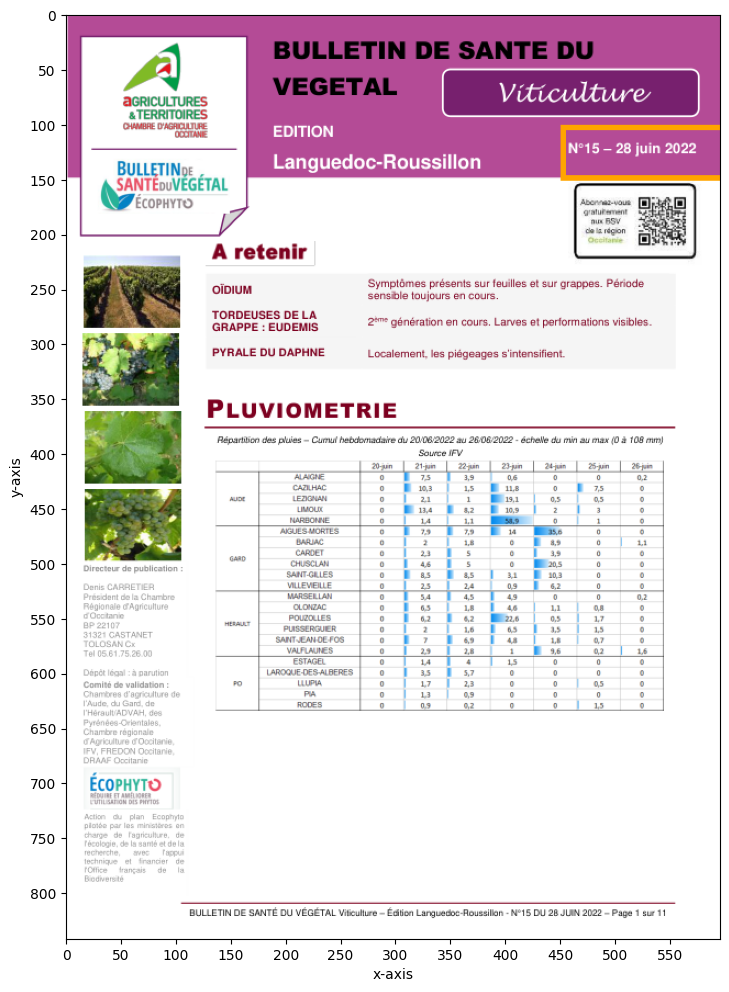

N°15 – 28 juin 2022


In [ ]:
import os
from PIL import Image, ImageDraw
import fitz
import matplotlib.pyplot as plt

def get_text_in_zone(page, coords, draw_rectangle=False):
    if draw_rectangle:
        x1, y1, x2, y2 = coords
        pix = page.get_pixmap()
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        draw = ImageDraw.Draw(img)

        draw.rectangle((x1, y1, x2, y2), outline="orange", width=5)

        plt.figure(figsize=(12, 12))
        plt.imshow(img)
        plt.xlabel('x-axis')
        plt.ylabel('y-axis')
        plt.xticks(range(0, pix.width, 50))
        plt.yticks(range(0, pix.height, 50))
        # plt.grid(True)
        plt.show()

    text = ""
    extracted_text = page.get_text("dict", sort=False, flags=fitz.TEXTFLAGS_TEXT)
    # Sort the blocks by their y-coordinates
    sorted_blocks = sorted(extracted_text["blocks"], key=lambda x: x["bbox"][1])

    for block in sorted_blocks:
        if block["type"] == 0:
            for line in block["lines"]:
                for span in line["spans"]:
                    span_bbox = span["bbox"]

                    if span_bbox[0] >= coords[0] and span_bbox[1] >= coords[1] and span_bbox[2] <= coords[2] and span_bbox[3] <= coords[3]:
                      if len(span["text"])>3:
                        text += span["text"] + " "
                      else:
                        text += span["text"]
                text = text.strip()

    return text.strip()

page = doc.load_page(0)
text = get_text_in_zone(page, (450, 100, 600, 150), draw_rectangle=True)
print(text)

In [ ]:
page

page 1 of /content/unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N15_28062022.pdf

[594.3200073242188, 840.9199829101562, 595.3200073242188, 841.9199829101562]


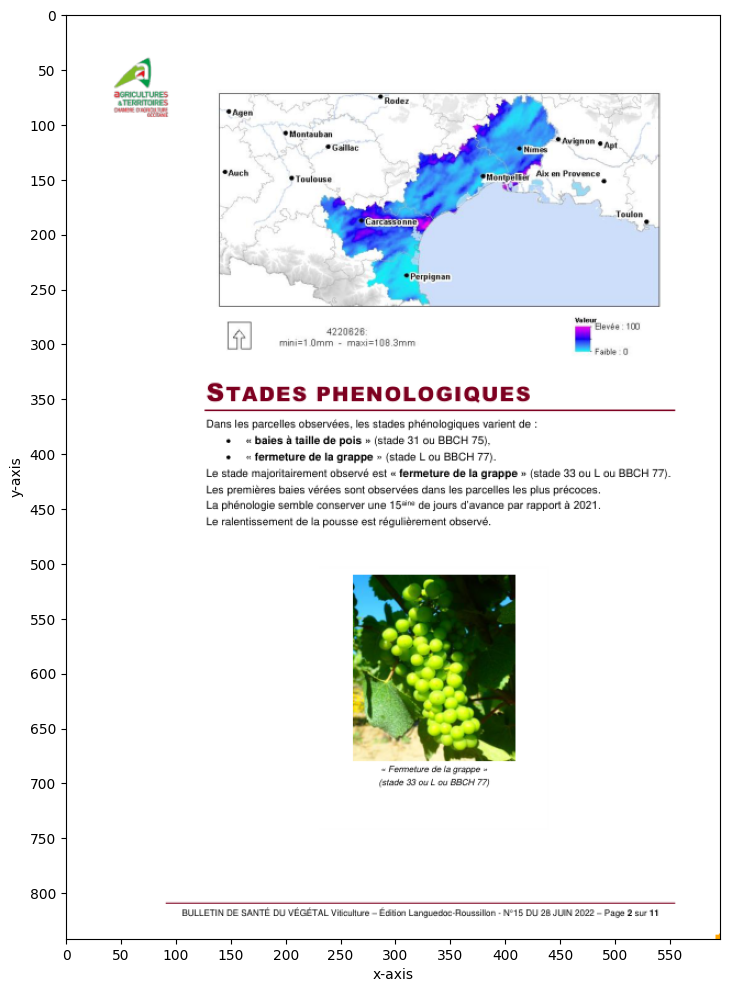

In [ ]:
page = doc.load_page(1)

def clamp_zone_to_page(page, zone_coords):

    page_width, page_height = page.rect[2], page.rect[3]

    clamped_coords = [
        max(0, min(zone_coords[0], page_width - 1)),
        max(0, min(zone_coords[1], page_height - 1)),
        min(zone_coords[2], page_width),
        min(zone_coords[3], page_height),
    ]

    return clamped_coords

def get_block_numbers_in_zone(page, bbox):
    bbox = clamp_zone_to_page(page, bbox)
    print(bbox)
    block_numbers = []
    extracted_text = page.get_text("dict", sort=False, flags=fitz.TEXTFLAGS_TEXT)

    for block in extracted_text["blocks"]:
        if block["type"] == 0:
            block_bbox = block["bbox"]

            if block_bbox[0] >= bbox[0] and block_bbox[1] >= bbox[1] and block_bbox[2] <= bbox[2] and block_bbox[3] <= bbox[3]:
                block_numbers.append(block["number"])

    return block_numbers

get_block_numbers_in_zone(page, (22220,2000,2500,22220))
text = get_text_in_zone(page, (594.3200073242188, 840.9199829101562, 595.3200073242188, 841.9199829101562), draw_rectangle=True)


In [ ]:
def calculate_intersection_area(bbox1, bbox2):
    x1 = max(bbox1[0], bbox2[0])
    y1 = max(bbox1[1], bbox2[1])
    x2 = min(bbox1[2], bbox2[2])
    y2 = min(bbox1[3], bbox2[3])

    if x1 < x2 and y1 < y2:
        return (x2 - x1) * (y2 - y1)
    return 0


def get_block_numbers_in_zone(page, bbox, threshold=0.8):
    block_numbers = []
    extracted_text = page.get_text("dict", sort=False, flags=fitz.TEXTFLAGS_TEXT)

    for block in extracted_text["blocks"]:
        if block["type"] == 0:
            block_bbox = block["bbox"]
            intersection_area = calculate_intersection_area(block_bbox, bbox)

            block_area = (block_bbox[2] - block_bbox[0]) * (block_bbox[3] - block_bbox[1])
            overlap_ratio = intersection_area / block_area

            if overlap_ratio >= threshold:
                block_numbers.append(block["number"])

    return block_numbers
get_block_numbers_in_zone(page,(0, 500, 0, 150))

[]

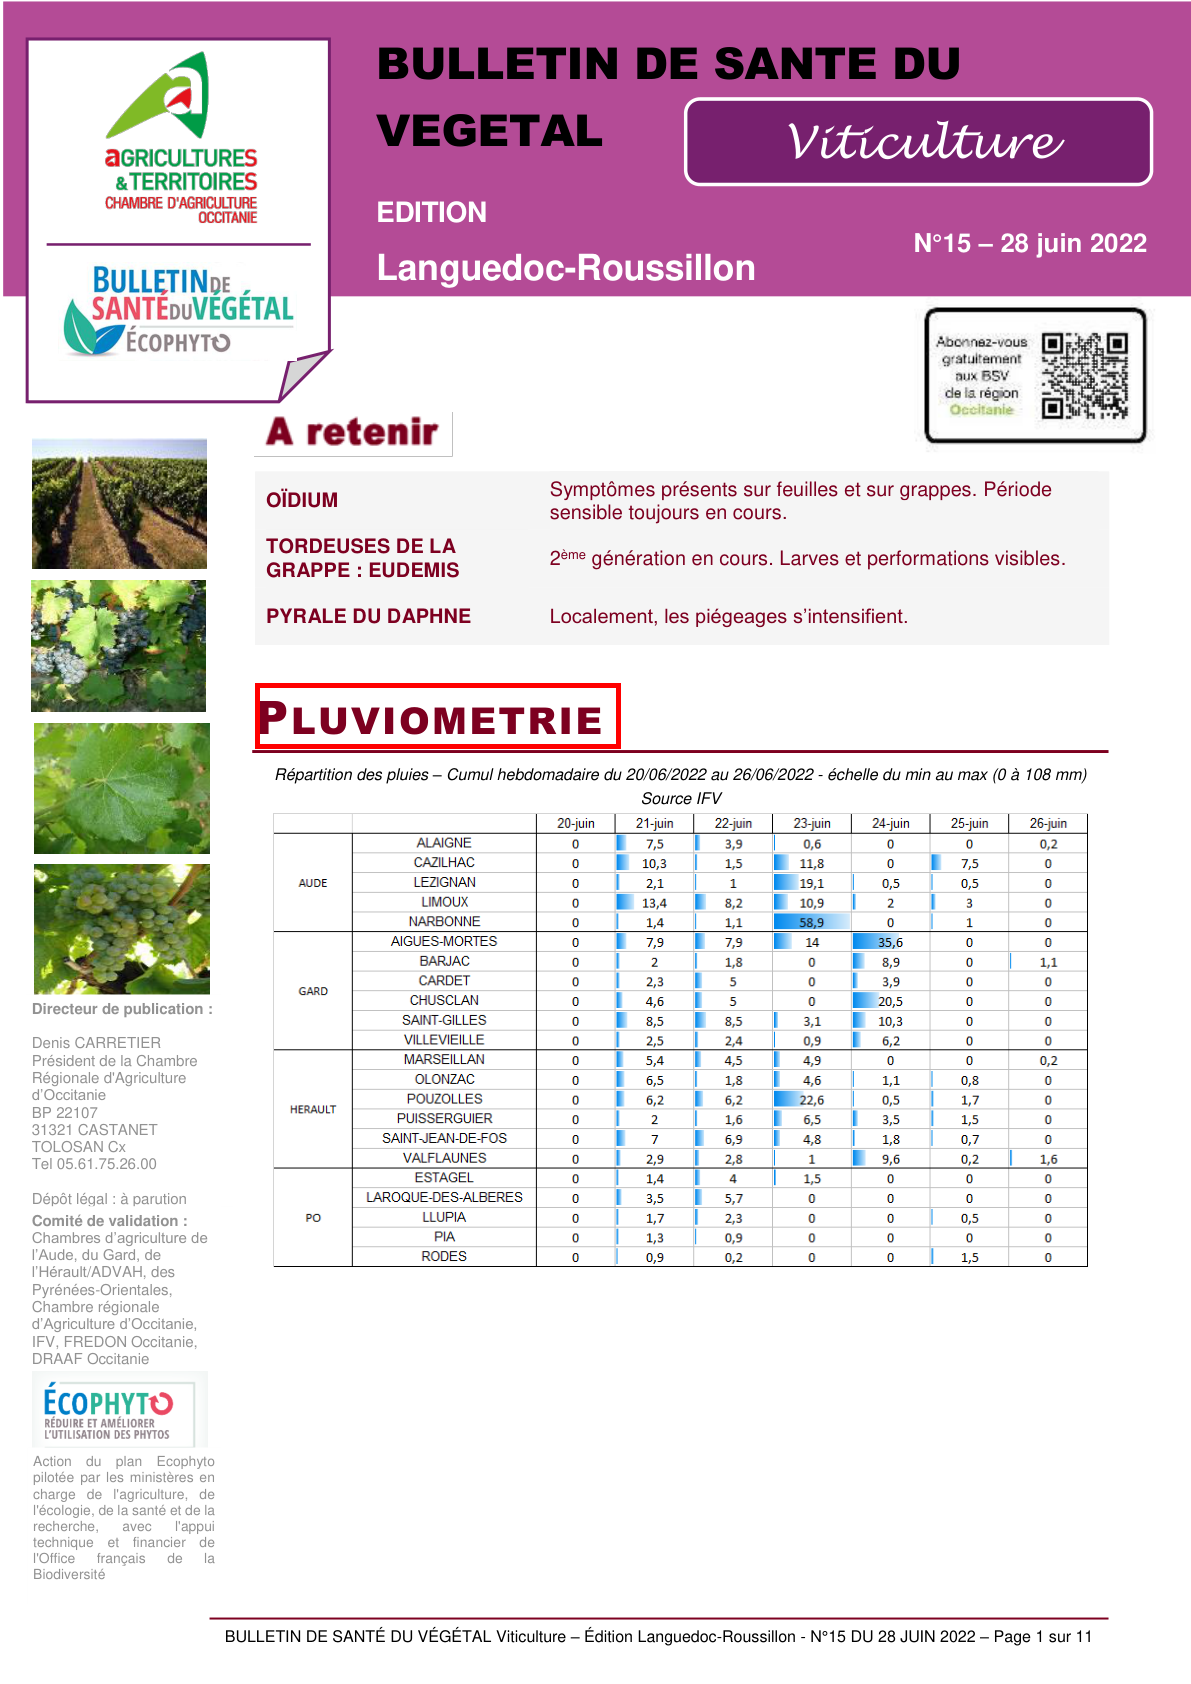

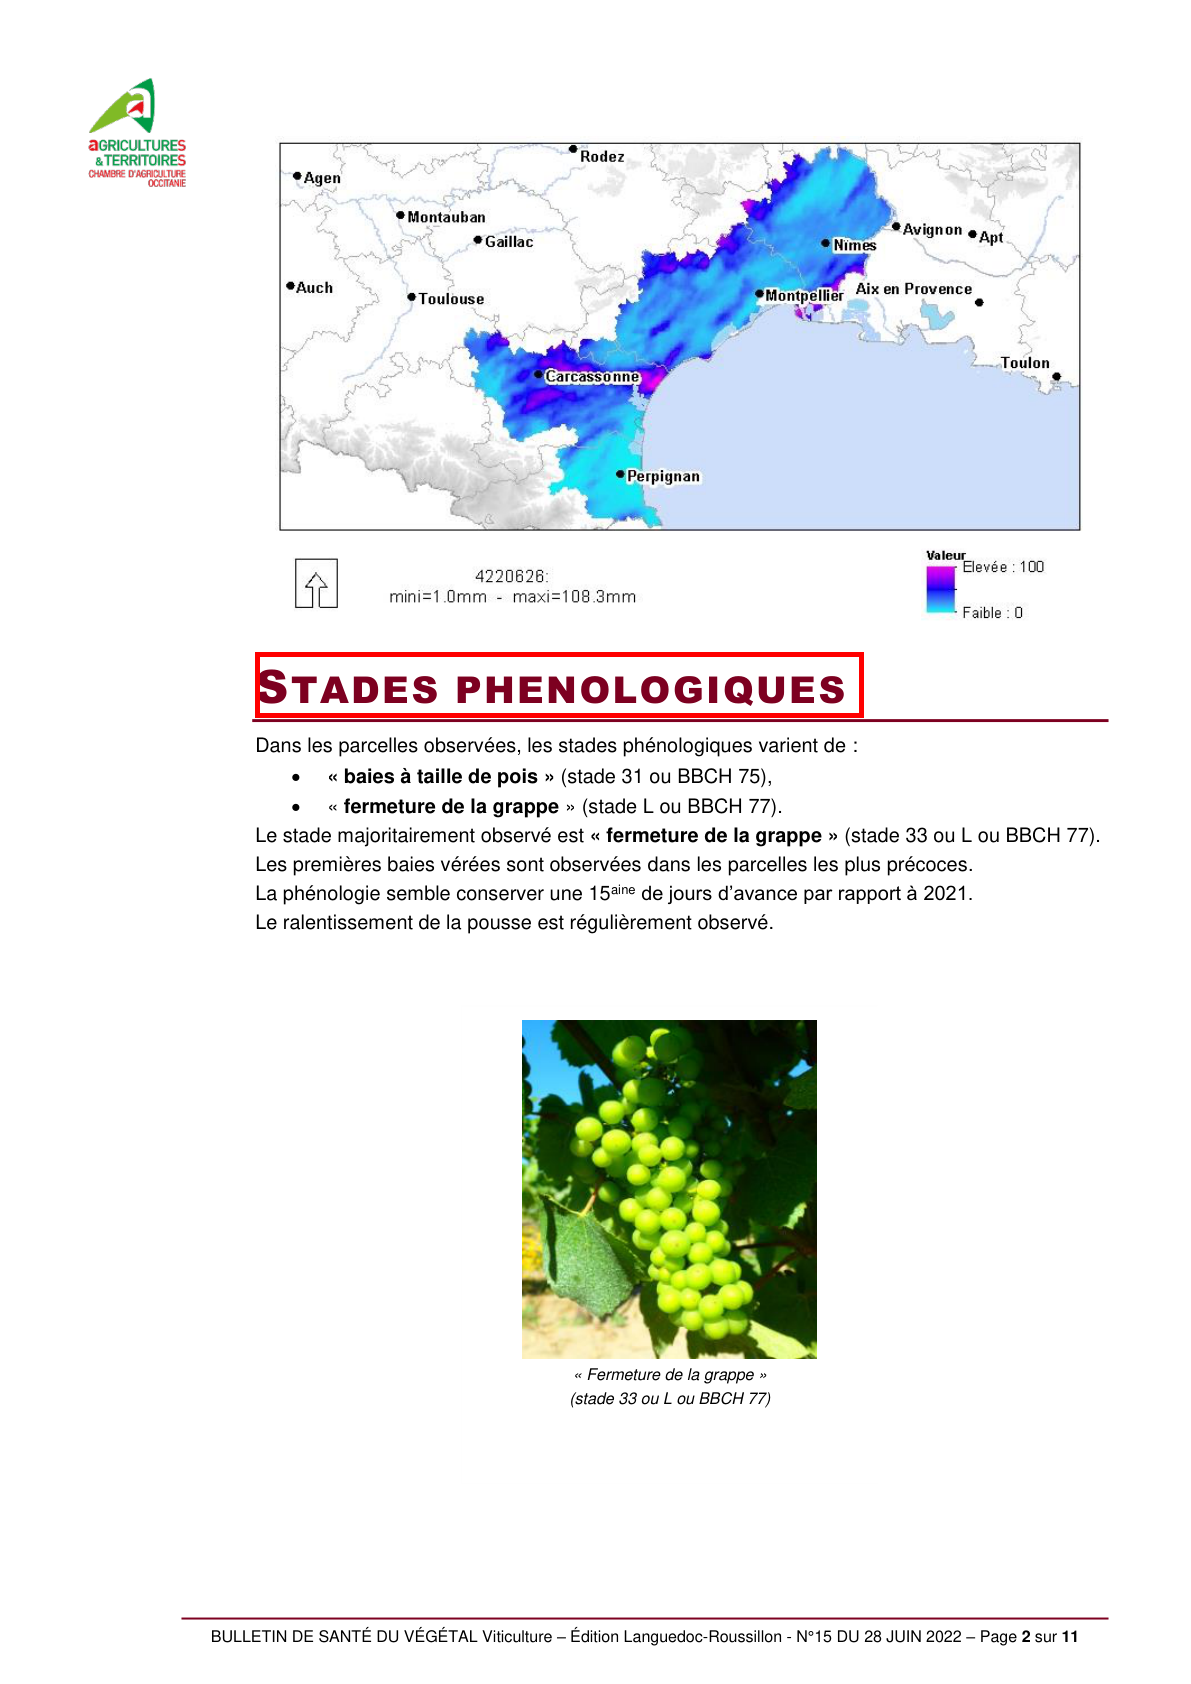

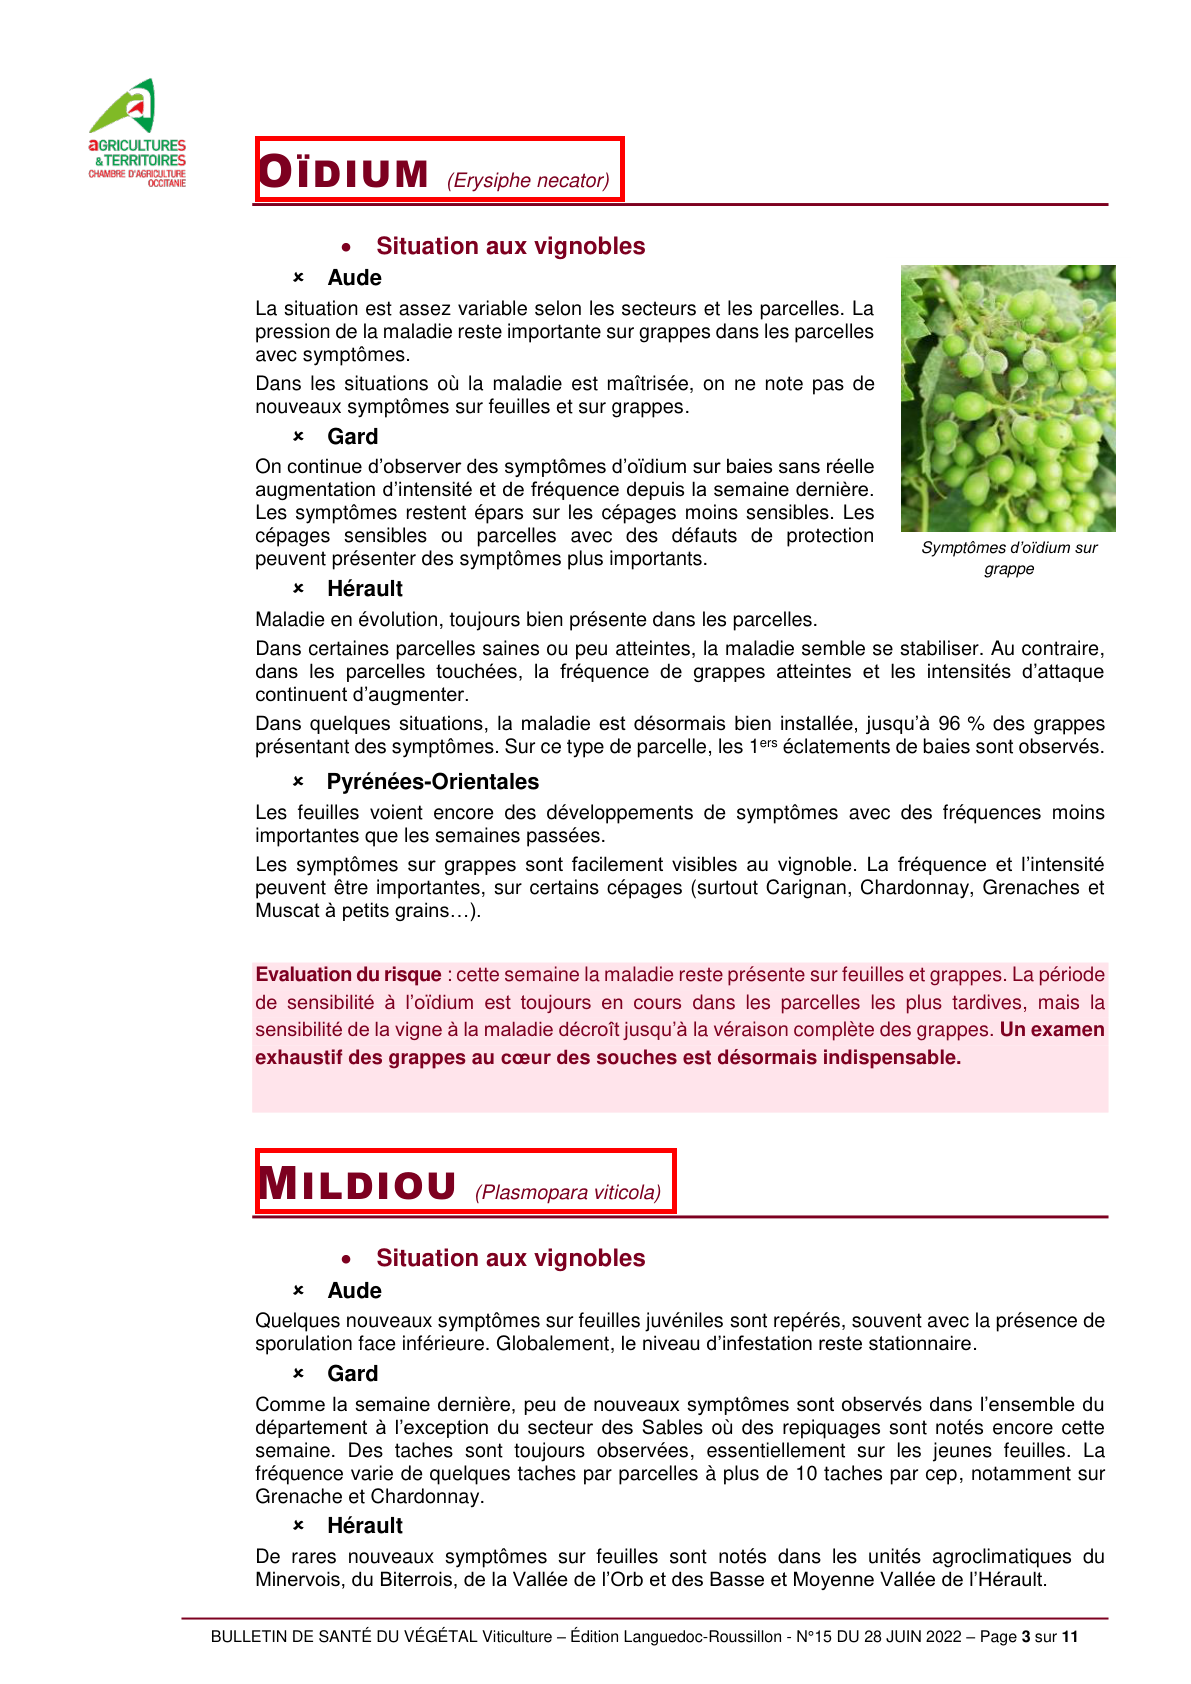

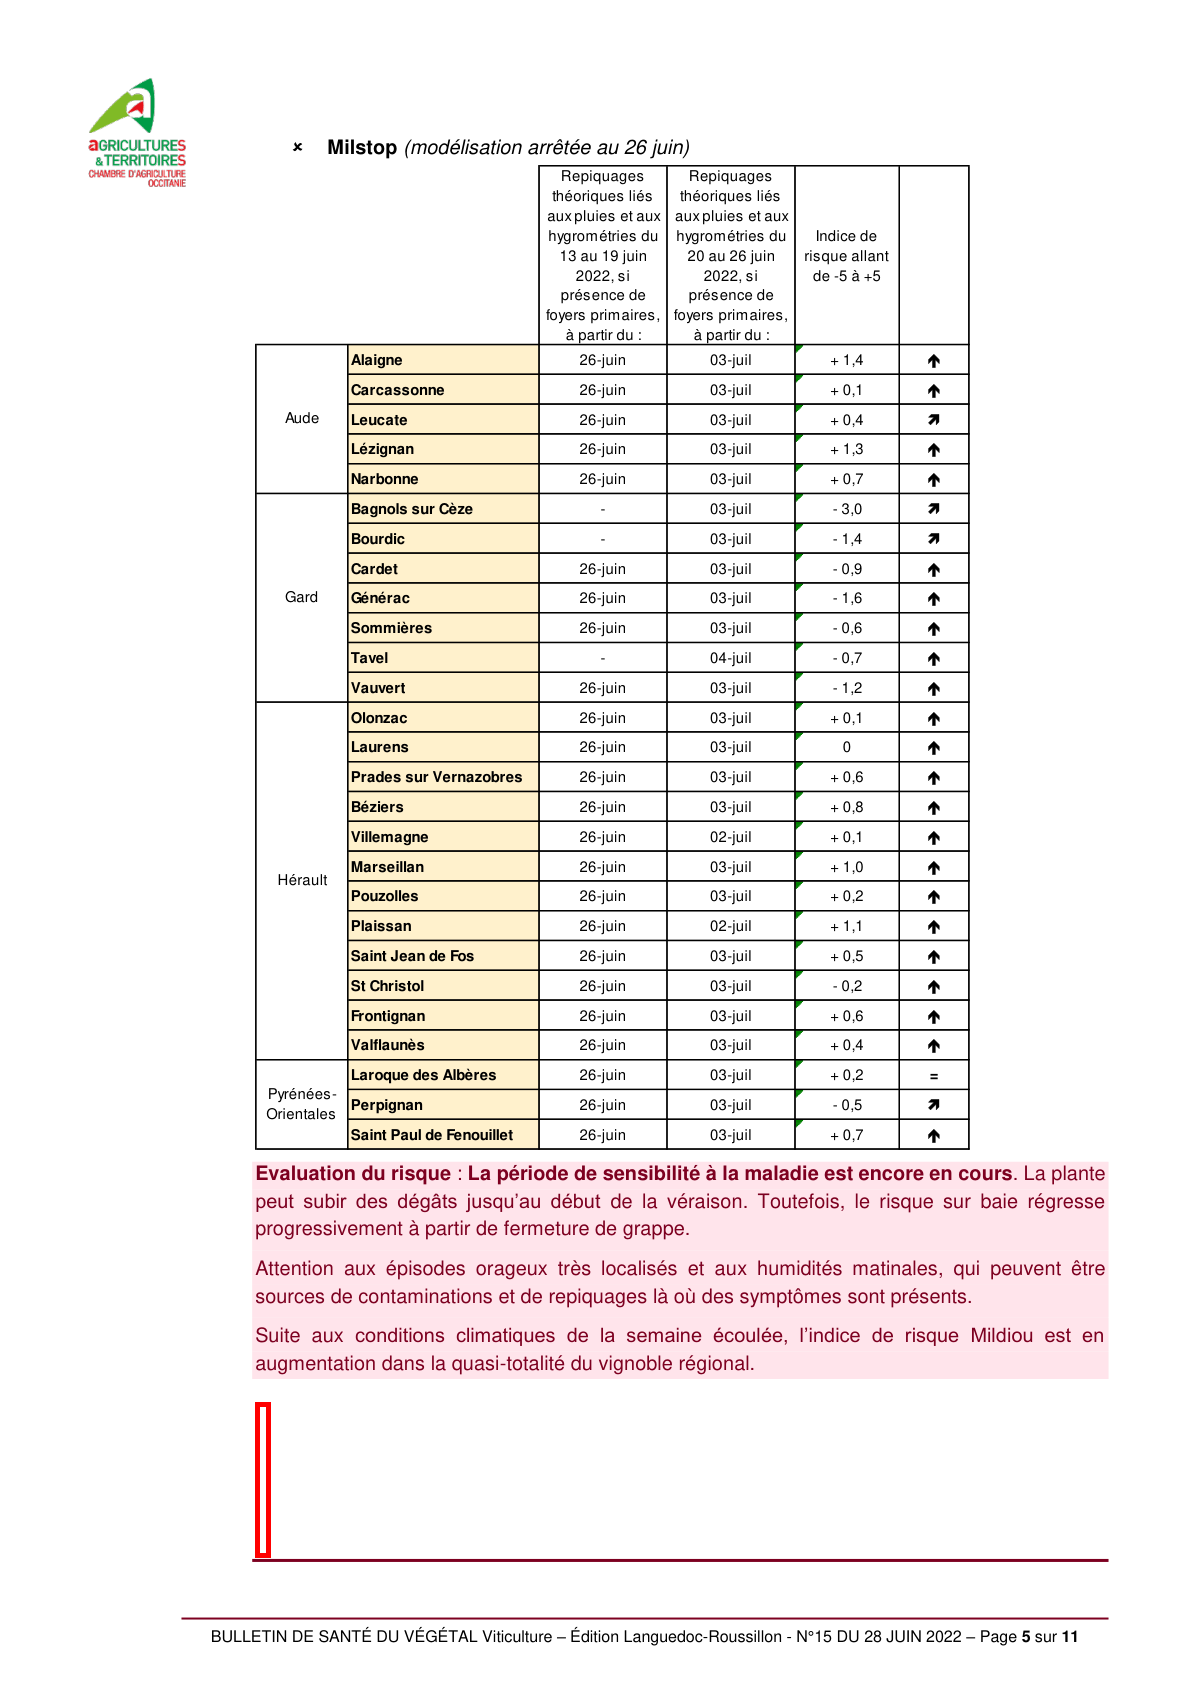

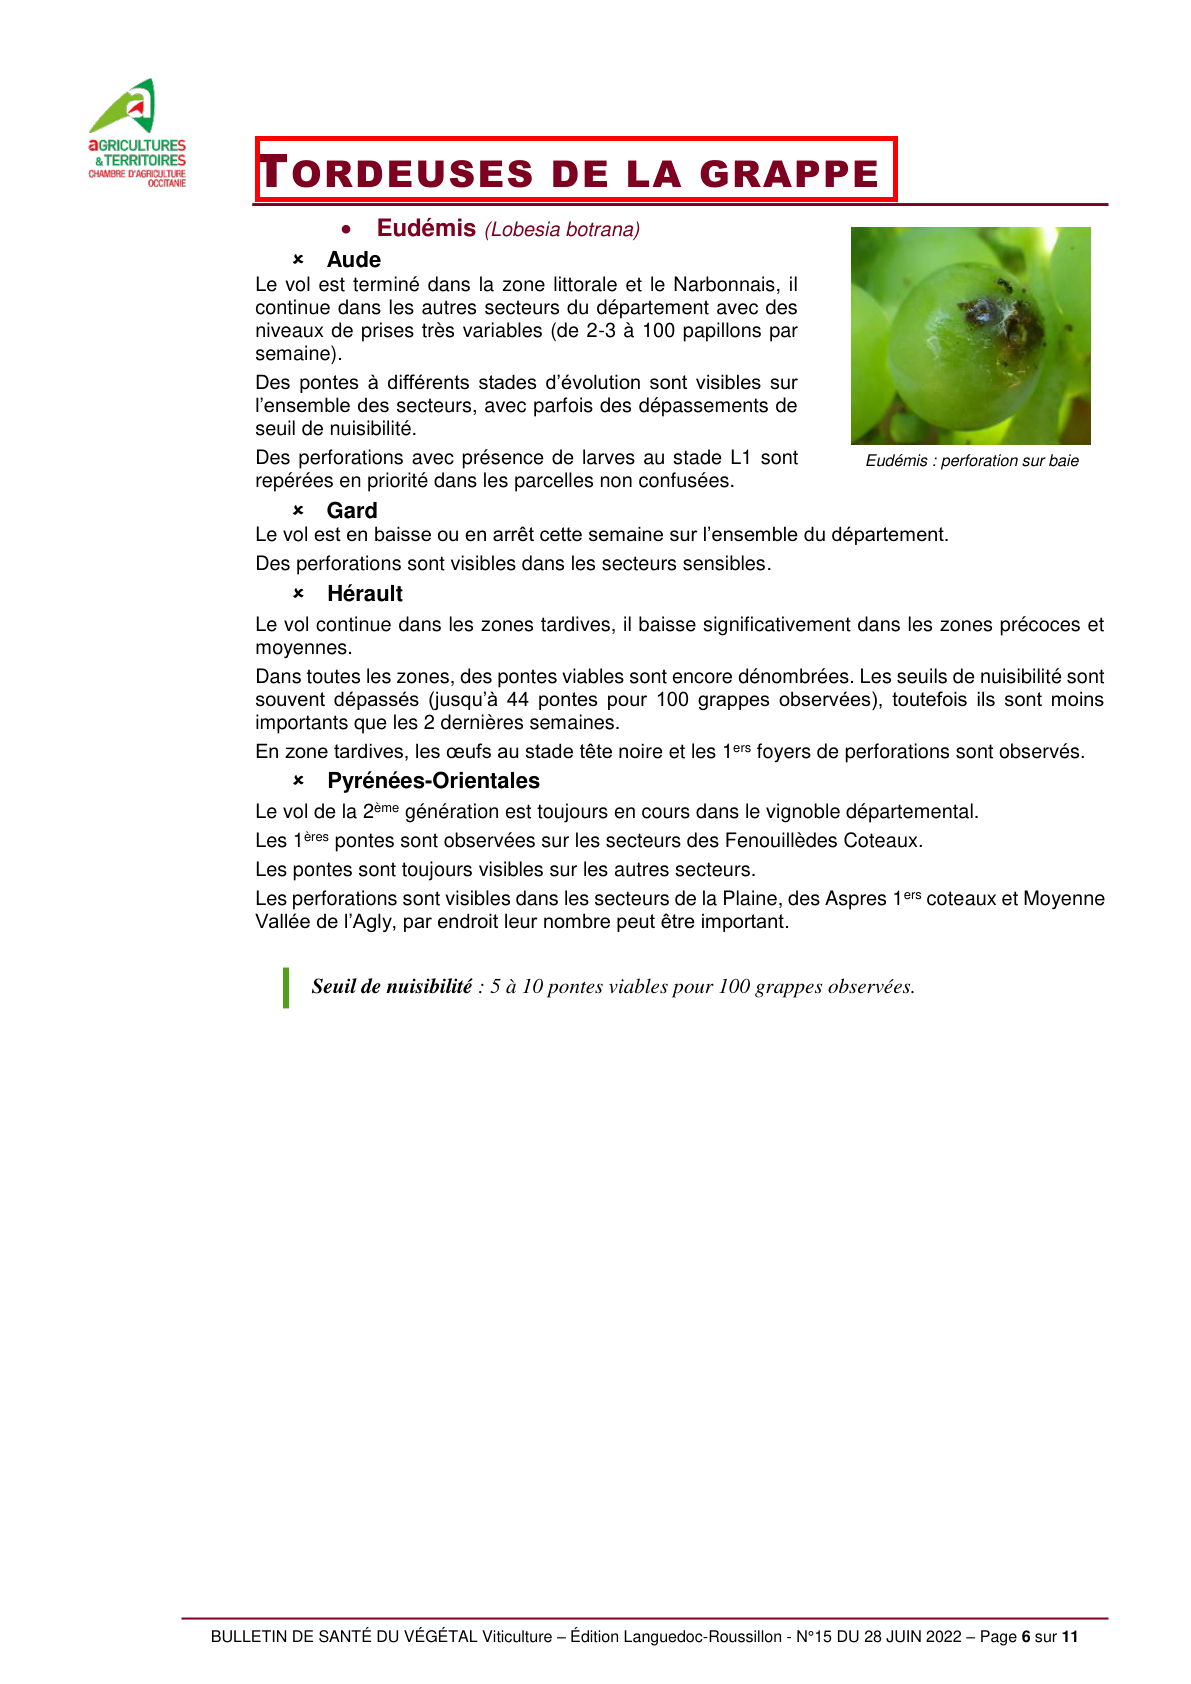

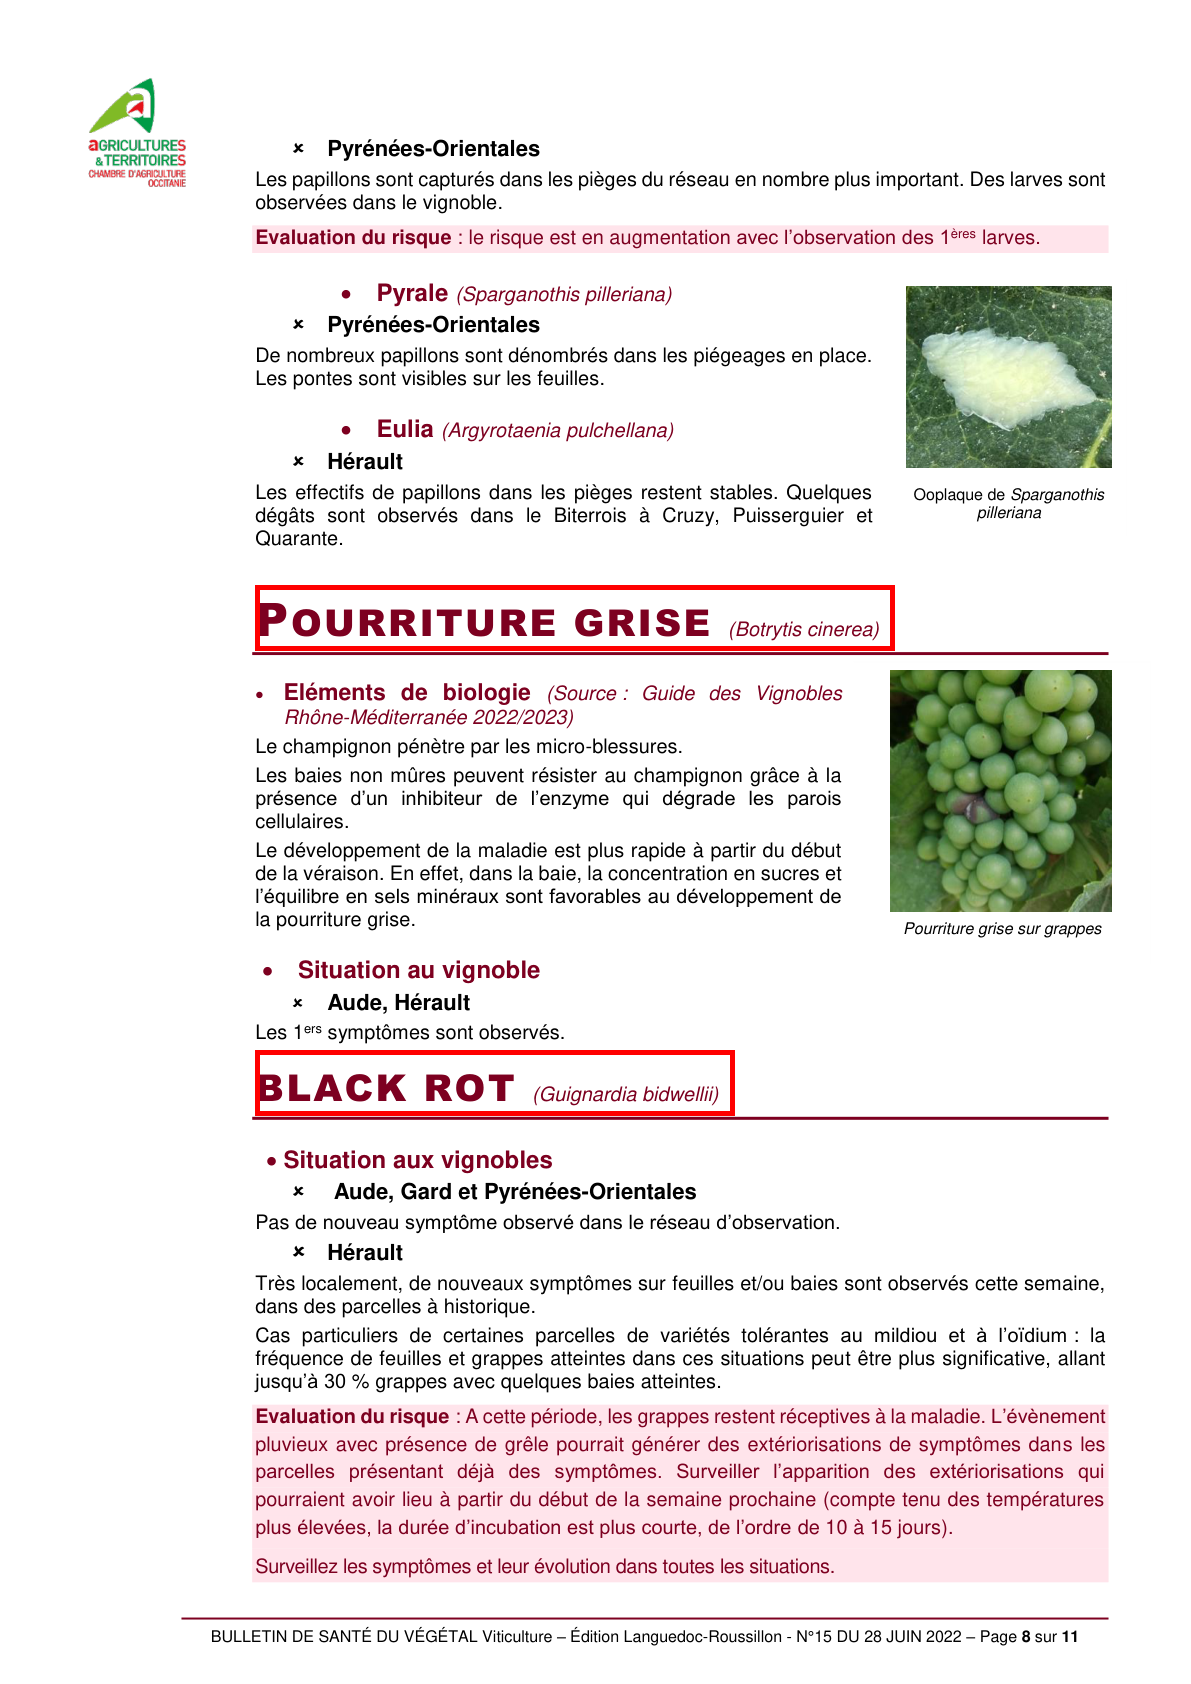

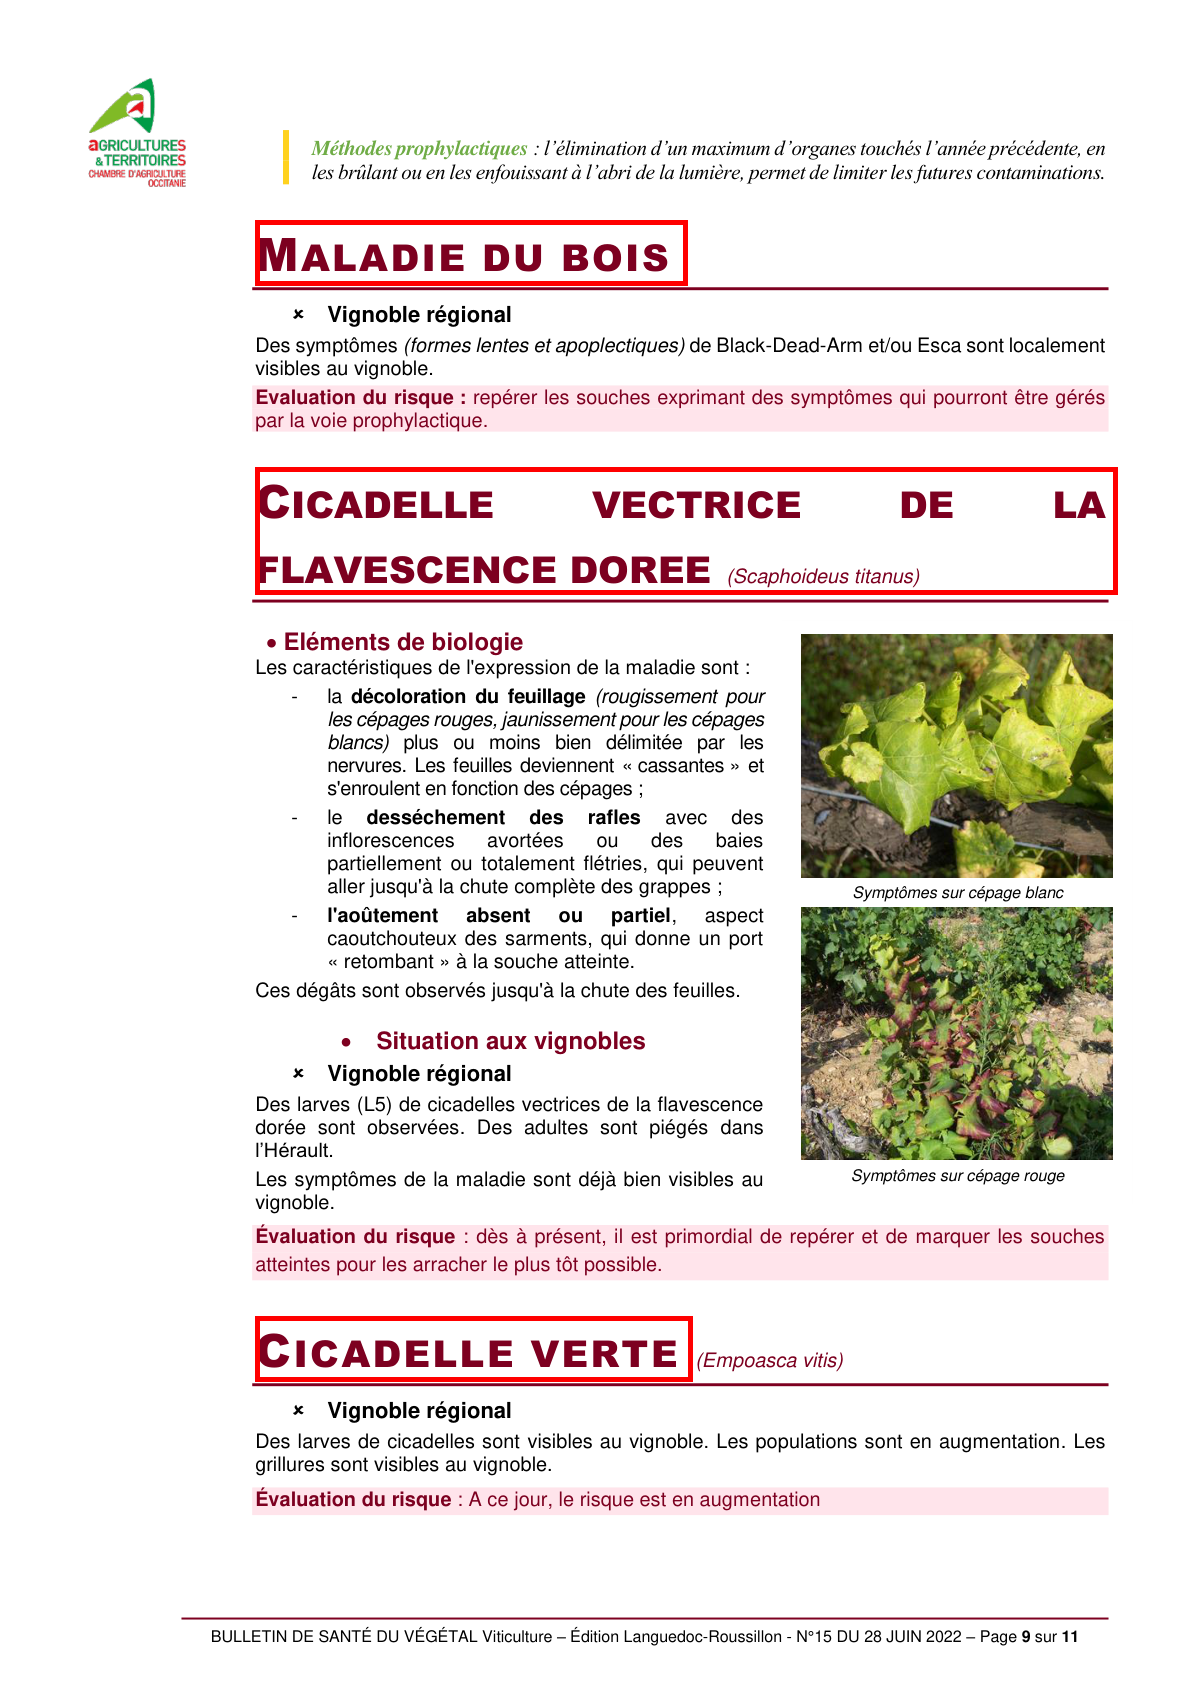

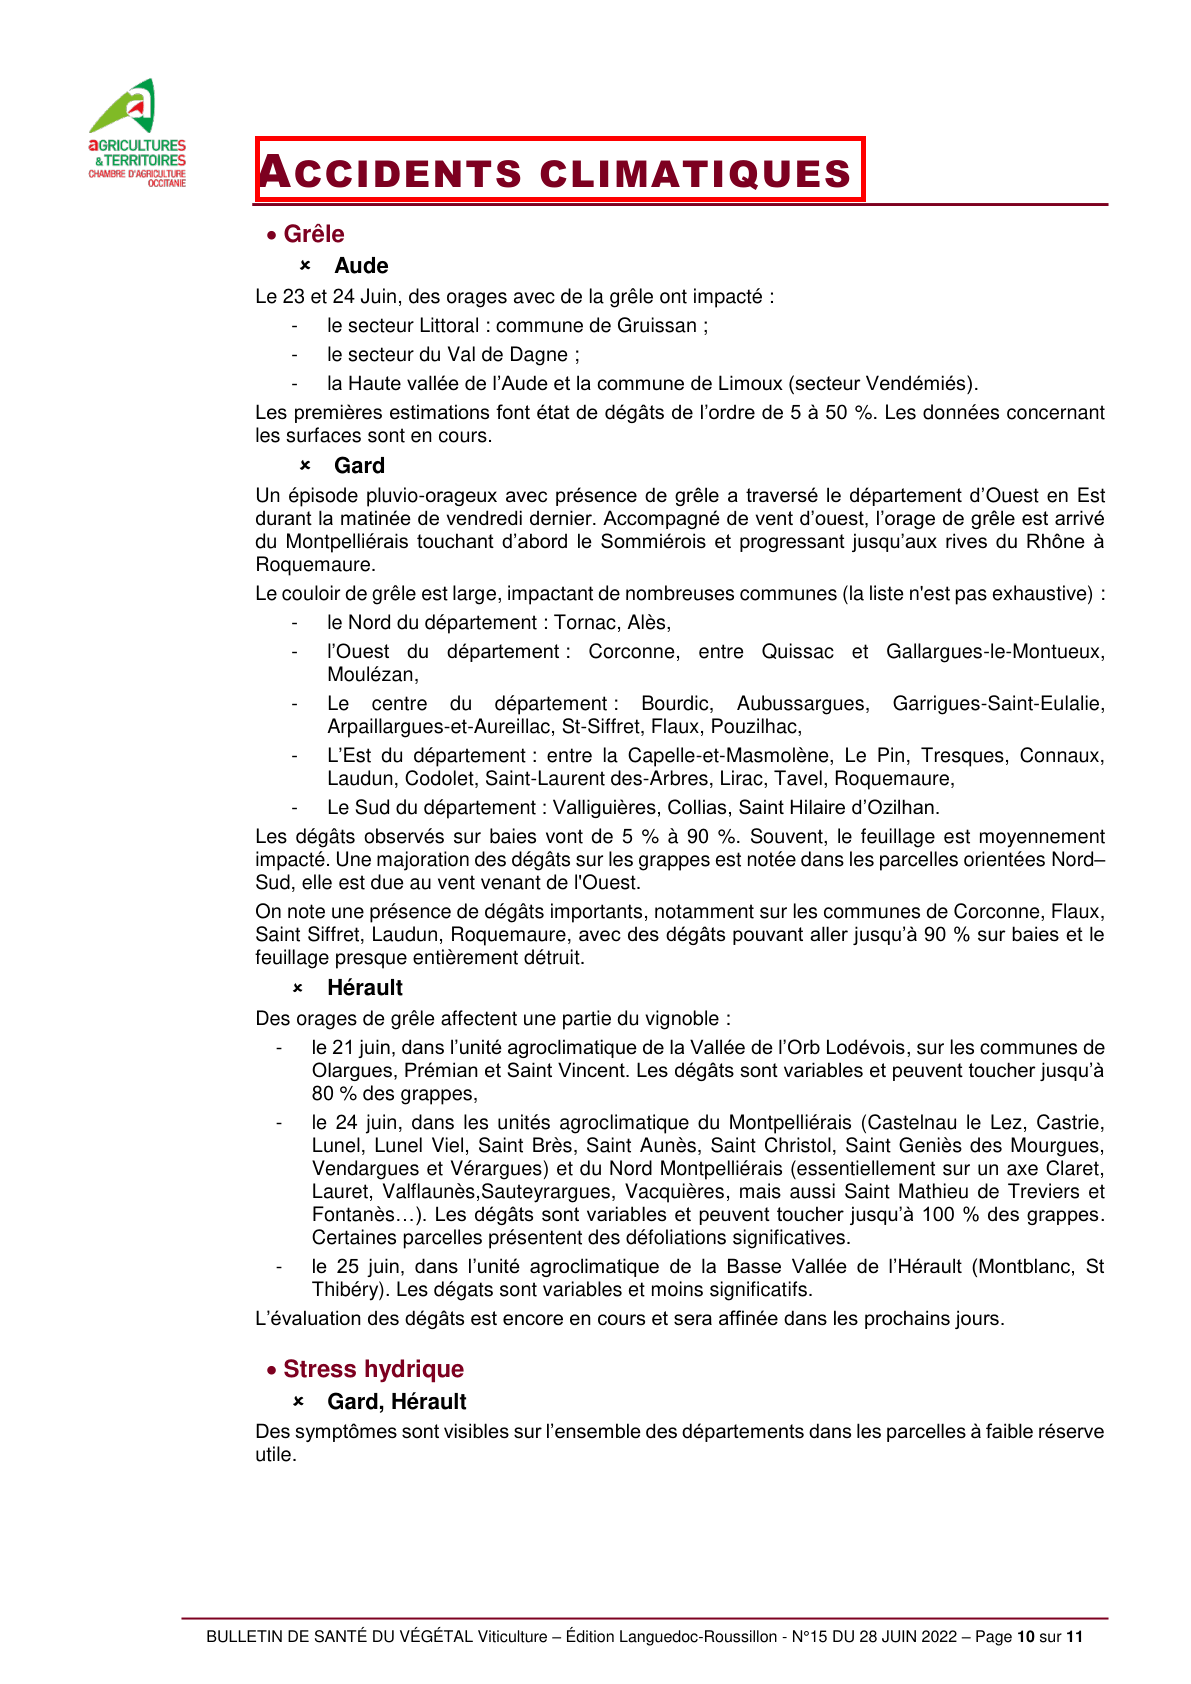

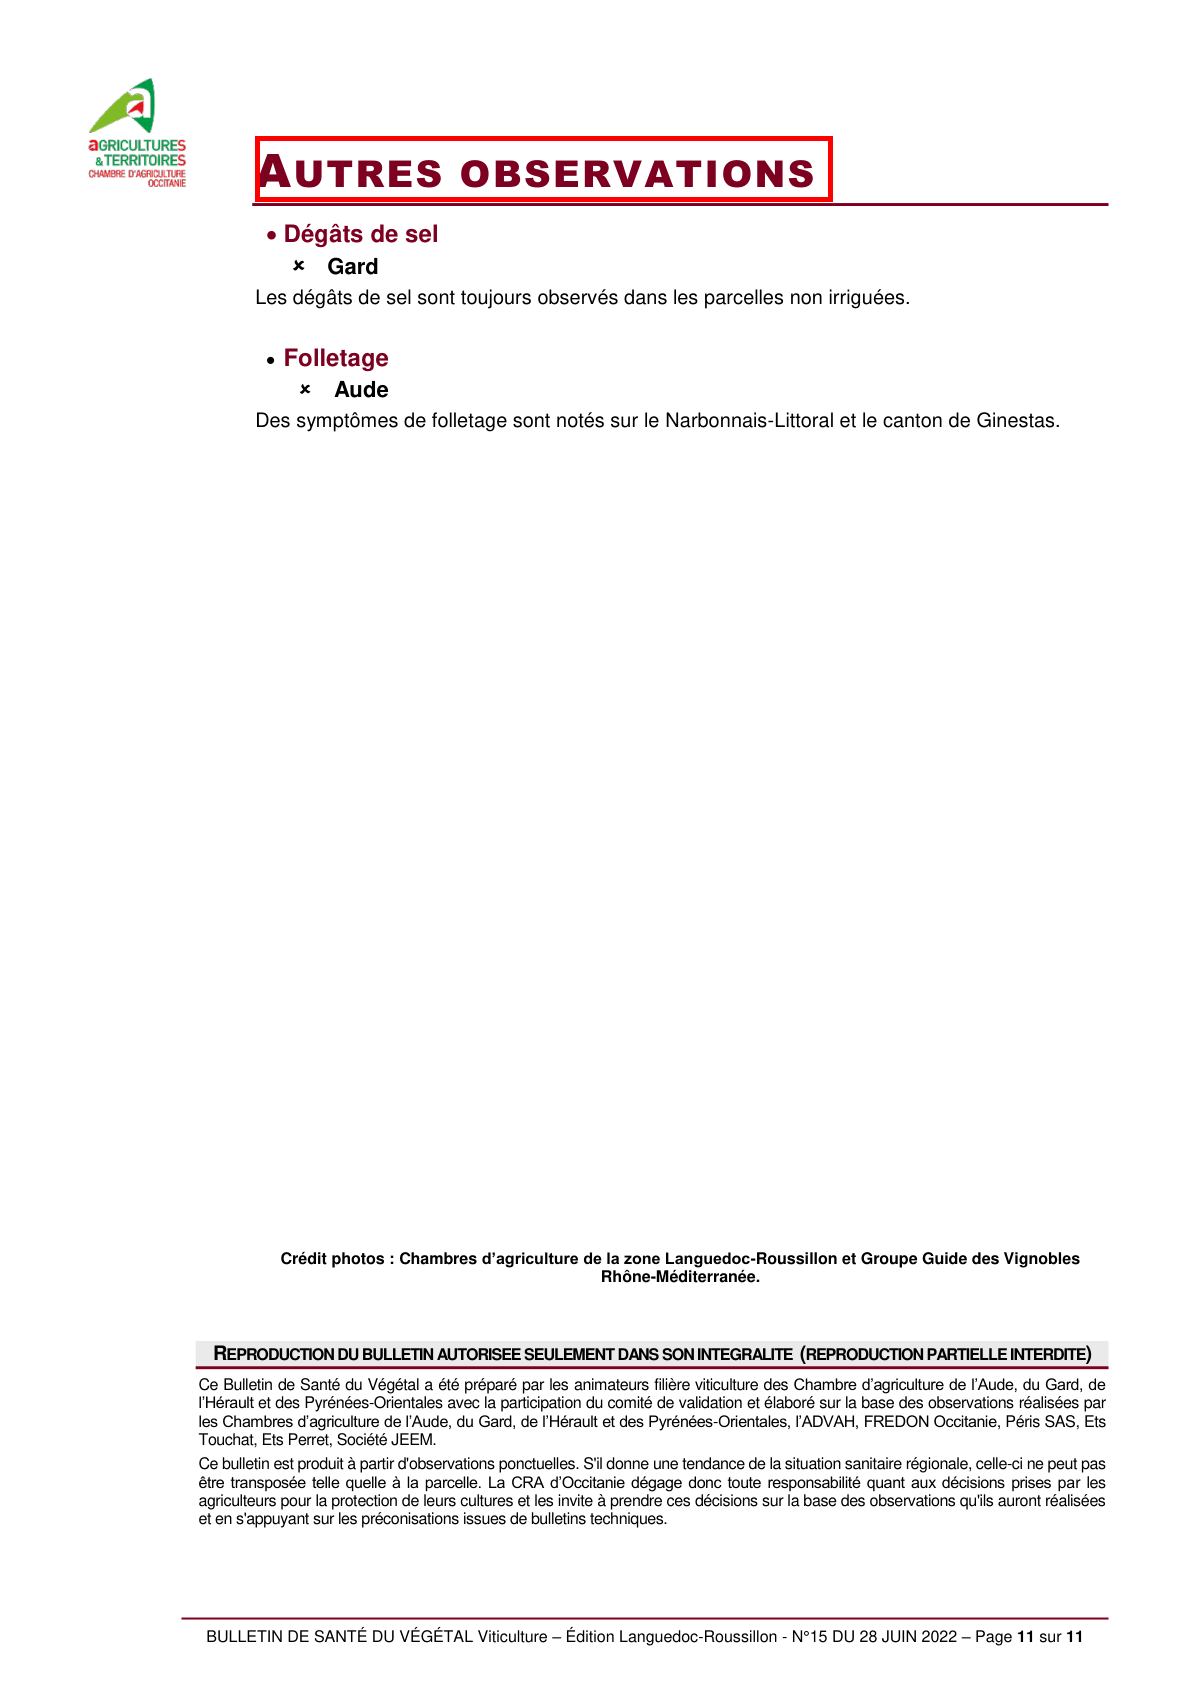

In [ ]:
import os
from PIL import Image, ImageDraw
import fitz
import numpy as np

def draw_rectangles(pix, bbox_coords, color="orange"):
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    draw = ImageDraw.Draw(img)

    for bbox in bbox_coords:
        scaled_bbox = [coord * 2 for coord in bbox]
        draw.rectangle(scaled_bbox, outline=color, width=5)

    return img
    
def merge_neighbor_bboxes(bbox_coords, threshold=50):
    def overlap_y(bbox1, bbox2):
        y1_1, y2_1 = bbox1[1], bbox1[3]
        y1_2, y2_2 = bbox2[1], bbox2[3]
        return (abs(y1_1 - y1_2) < threshold or abs(y1_1 - y2_2) < threshold) or \
               (abs(y2_1 - y1_2) < threshold or abs(y2_1 - y2_2) < threshold)

    def merge_bbox(bbox1, bbox2):
        return [min(bbox1[0], bbox2[0]), min(bbox1[1], bbox2[1]),
                max(bbox1[2], bbox2[2]), max(bbox1[3], bbox2[3])]

    merged = True
    while merged:
        merged = False
        new_bbox_coords = []
        merged_indices = []

        for i, bbox1 in enumerate(bbox_coords):
            if i in merged_indices:
                continue

            new_bbox = bbox1
            for j, bbox2 in enumerate(bbox_coords):
                if j in merged_indices or i == j:
                    continue

                if overlap_y(new_bbox, bbox2):
                    new_bbox = merge_bbox(new_bbox, bbox2)
                    merged = True
                    merged_indices.append(j)

            new_bbox_coords.append(new_bbox)

        bbox_coords = new_bbox_coords

    return bbox_coords

def process_sections(page, threshold = 50):
    saved_bbox = []
    bbox_coords = []
    identified_sections = []
    identified_sections_coords = []

    page_blocks = page.get_text("dict", sort=False, flags=fitz.TEXTFLAGS_TEXT)

    for block in page_blocks["blocks"]:
        if block["type"] == 0:
            for line in block["lines"]:
                for span in line["spans"]:
                    if span["size"] > 15 and span["color"] == 8192032:
                        saved_bbox.append(span["bbox"])
                        
    for s_bbox in saved_bbox:
        bbox_coords.append([coord for coord in s_bbox])

    bbox_coords = merge_neighbor_bboxes(bbox_coords, threshold)
    for bbox in bbox_coords:
      foo = [coord for coord in bbox]
      found_text = get_text_in_zone(page, foo, draw_rectangle=False)
      if len(found_text) > 2:
        identified_sections.append(found_text)
        identified_sections_coords.append(foo)
    return bbox_coords, identified_sections, identified_sections_coords

def process_document(pdf_path, output_dir="output_dict", draw_in_between_zones=False):
    pdf_name = os.path.splitext(os.path.basename(pdf_path))[0]
    os.makedirs(os.path.join(output_dir, pdf_name), exist_ok=True)
    image_path = os.path.join(output_dir, pdf_name)

    doc = fitz.open(pdf_path)

    identified_sections = []
    identified_sections_coords = []

    for page_num, page_i in enumerate(doc):
        bbox_coords, sections, coords = process_sections(page_i)

        identified_sections.extend(sections)
        identified_sections_coords.extend(coords)

        if len(bbox_coords) > 0:
            pix = page_i.get_pixmap(matrix=fitz.Matrix(2, 2))
            img = draw_rectangles(pix, bbox_coords, color="RED")

            in_between_zones = []

            for i in range(len(coords)):
                zone_start = coords[i][3]  # y2 of the current section
                if i < len(coords) - 1:
                    zone_end = coords[i + 1][1]  # y1 of the next section
                else:
                    zone_end = pix.height/2  # bottom of the current page
                in_between_zones.append((coords[i][0]-10, zone_start + 5, pix.width/2, zone_end - 5))

            if page_num == len(doc) - 1:
                zone_start = coords[-1][3]  # y2 of the last section
                zone_end = pix.height/2  # bottom of the last page
                in_between_zones.append((0, zone_start + 5, pix.width/2, zone_end))

            if draw_in_between_zones:
                img = draw_rectangles(pix, in_between_zones, color="green")

            image_name = f"page{page_num + 1}.png"
            image_path_name = os.path.join(image_path, image_name)
            img.save(image_path_name)
            display(img)

            # for zone in in_between_zones:
              # text = get_text_in_zone(page, zone, draw_rectangle=False)
              # print(f"\n{text}\n")

    # Calculate in-between zones for the entire document
    # in_between_zones = []

    return identified_sections, identified_sections_coords, in_between_zones


# Processing : 
identified_sections, identified_sections_coords, in_between_zones = process_document(pdf_path, draw_in_between_zones=False)


In [ ]:
print("Identified sections:")
for section in identified_sections:
    print(f"- {section}")

print("\nIdentified sections coordinates:")
for coord in identified_sections_coords:
    print(coord)

# print("\nIn-between zones:")
# for zone in in_between_zones:
#     print(zone)


Identified sections:
- PLUVIOMETRIE
- STADES PHENOLOGIQUES
- OÏDIUM  (Erysiphe necator)
- MILDIOU  (Plasmopara viticola)
- TORDEUSES DE LA GRAPPE
- POURRITURE GRISE  (Botrytis cinerea)
- BLACK ROT  (Guignardia bidwellii)
- MALADIE DU BOIS
- CICADELLEVECTRICEDELAFLAVESCENCE DOREE  (Scaphoideus titanus)
- CICADELLE VERTE
- ACCIDENTS CLIMATIQUES
- AUTRES OBSERVATIONS

Identified sections coordinates:
[127.58000183105469, 341.6524658203125, 310.2537536621094, 374.1424865722656]
[127.58000183105469, 326.1724548339844, 431.833740234375, 358.6624755859375]
[127.58000183105469, 68.12248229980469, 312.41375732421875, 100.61248016357422]
[127.58000183105469, 574.3524780273438, 338.09375, 606.8424682617188]
[127.58000183105469, 68.12248229980469, 448.6337585449219, 100.61248016357422]
[127.58000183105469, 292.6924743652344, 447.3137512207031, 325.1824951171875]
[127.58000183105469, 525.0325317382812, 367.15374755859375, 557.5225219726562]
[127.58000183105469, 110.26249694824219, 343.5137329101562

In [ ]:
import os
import glob
# Set the path of the folder containing PDF files
folder_path = "/content/unibsv/data/UniBSV/BSV Languedoc-Roussillon"

global_sections_list = []

# Use the glob module to find all PDF files in the folder
pdf_files = glob.glob(os.path.join(folder_path, "*.pdf"))

# Loop through each PDF file
for pdf_file in pdf_files:
    # Do something with the PDF file
    print(f"*** Document : {pdf_file} ***\n")
    identified_sections, identified_sections_coords, in_between_zones = process_document(pdf_file, draw_in_between_zones=False)

    global_sections_list.extend(identified_sections)
    
    print("Identified sections:")
    for section in identified_sections:
        print(f"- {section}")
    print("\n")

*** Document : /content/unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N08_10052022.pdf ***

Identified sections:
- PLUVIOMETRIE
- STADES PHENOLOGIQUES
- OÏDIUM  (Erysiphe necator)
- MILDIOU  (Plasmopara viticola)
- BLACK ROT  (Guignardia bidwellii)
- POURRITURE GRISE
- TORDEUSES DE LA GRAPPE
- CICADELLEVECTRICEDELAFLAVESCENCE DOREE  (Scaphoideus titanus)
- CICADELLE VERTE  (Empoasca vitis)
- ERINOSE
- RAVAGEURS SECONDAIRES


*** Document : /content/unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N20_09082022.pdf ***

Identified sections:
- STADES PHENOLOGIQUES
- TORDEUSES DE LA GRAPPE
- FLAVESCENCE DOREE
- OÏDIUM  (Erysiphe necator)
- MILDIOU  (Plasmopara viticola)
- POURRITURE GRISE  (Botrytis cinerea)
- ASPERGILLUS CARBONARIUS
- POURRITURE ACIDE
- MALADIES DU BOIS
- CICADELLE VERTE
- COCHENILLES
- ACCIDENTS CLIMATIQUES
- AUTRES OBSERVATIONS


*** Document : /content/unibsv/data/UniBSV/BSV Languedoc-Roussillon/BSV_VITI_LR_N15_28062022.pdf ***

Identified sections:
- 

In [ ]:
# duplicates removal
my_list = sorted(set(global_sections_list))
display(my_list)

['ACARIENS',
 'ACCIDENT CLIMATIQUE',
 'ACCIDENT PHYSIOLOGIQUE',
 'ACCIDENTS CLIMATIQUES',
 'ASPERGILLUS CARBONARIUS',
 'AUTRES OBSERVATIONS',
 'BLACK ROT  (Guignardia bidwellii)',
 'CICADELLE VERTE',
 'CICADELLE VERTE  (Empoasca vitis)',
 'CICADELLEVECTRICEDELAFLAVESCENCE DOREE  (Scaphoideus titanus)',
 'COCCINELLE',
 'COCHENILLES',
 'DONNEES DE LA MODELISATION DANS LESBSV VIGNECARACTERISTIQUES DES MODELES',
 'ERINOSE',
 'EUTYPIOSE',
 'EXCORIOSE  (Phomopsis viticola)',
 'FLAVESCENCE DOREE',
 'FOCUS XYLELLA FASTIDIOSA',
 'MALADIE DU BOIS',
 'MALADIES DU BOIS',
 'METCALFA PRUINOSA',
 'MILDIOU  (Plasmopara viticola)',
 'NECROSE BACTERIENNE  (Xylophilus ampelinus)',
 'OÏDIUM  (Erysiphe necator)',
 'PLUVIOMETRIE',
 'POURRITURE ACIDE',
 'POURRITURE GRISE',
 'POURRITURE GRISE  (Botrytis cinerea)',
 'RAVAGEURS SECONDAIRES',
 'RAVAGEURSSECONDAIRES',
 'STADES PHENOLOGIQUES',
 'Stade « baies à taille de grains de plomb »(stade 29 ou BBCH 73)CICADELLEVECTRICEDELAFLAVESCENCE DOREE  (Scaphoideus tit

## Extraction des contenus des sections grâce aux numéros de blocs intermédiaires

In [ ]:
page = doc.load_page(1)
text_dict = page.get_text("dict", sort=False, flags=fitz.TEXTFLAGS_TEXT)
for elt in text_dict.items():
  print(elt)

('width', 595.32)
('height', 841.92)
('blocks', [{'number': 0, 'type': 0, 'bbox': (127.58000183105469, 27.600006103515625, 130.07586669921875, 38.6400032043457), 'lines': [{'spans': [{'size': 11.039999961853027, 'flags': 0, 'font': 'Calibri', 'color': 0, 'ascender': 0.75, 'descender': -0.25, 'text': ' ', 'origin': (127.58000183105469, 35.8800048828125), 'bbox': (127.58000183105469, 27.600006103515625, 130.07586669921875, 38.6400032043457)}], 'wmode': 0, 'dir': (1.0, 0.0), 'bbox': (127.58000183105469, 27.600006103515625, 130.07586669921875, 38.6400032043457)}]}, {'number': 1, 'type': 0, 'bbox': (105.37999725341797, 812.3729858398438, 541.8551025390625, 823.4842529296875), 'lines': [{'spans': [{'size': 8.039999961853027, 'flags': 0, 'font': 'ArialMT', 'color': 0, 'ascender': 1.0750000476837158, 'descender': -0.29899999499320984, 'text': 'BULLETIN DE SANTÉ DU VÉGÉTAL Viticulture – Édition Languedoc-Roussillon - N°15 DU 28 JUIN 2022 – Page ', 'origin': (105.37999725341797, 821.015991210937

## Conversion en format HTML pour observer la hierarchie

In [ ]:
from io import StringIO
from pdfminer.high_level import extract_text_to_fp
from pdfminer.layout import LAParams
import codecs
import os
import IPython

# Create output folder if it doesn't exist
if not os.path.exists("XHTML"):
    os.mkdir("XHTML")

output_string = StringIO()
with open(pdf_path, 'rb') as fin:
    extract_text_to_fp(fin, output_string, laparams=LAParams(),
                       output_type='html', codec=None)

# Save output as .xhtml file in output folder
with codecs.open('XHTML/output.xhtml', 'w', encoding='utf-8') as f:
    f.write(output_string.getvalue().strip())

# Display xhtml content in notebook
with codecs.open('XHTML/output.xhtml', 'r', encoding='utf-8') as f:
    xhtml_content = f.read()

IPython.display.HTML(xhtml_content)


## Extraction des images

In [ ]:
import fitz
import PIL.Image
import io
import os

In [ ]:
pdf = fitz.open(pdf_path)
counter = 1
page_counter = 0
for i in range(len(pdf)):
    page_counter += 1
    page = pdf[i]
    images = page.get_images()
    for image in images:
        base_img = pdf.extract_image(image[0])
        image_data = base_img["image"]
        img = PIL.Image.open(io.BytesIO(image_data))
        extension = base_img["ext"]
        folder = f'extracted_images/page_{page_counter}'
        if not os.path.exists(folder):
            os.makedirs(folder)
        img.save(open(f'{folder}/image{counter}.{extension}', "wb"))
        counter += 1
    if counter ==1:
        break